# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [8]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']



# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [9]:
male_df.Height.mean()
male_df.Weight.mean()
male_df.Height.std()
male_df.loc[male_df.Height]

KeyError: 'None of [0       73.847017\n1       68.781904\n2       74.110105\n3       71.730978\n4       69.881796\n5       67.253016\n6       68.785081\n7       68.348516\n8       67.018950\n9       63.456494\n10      71.195382\n11      71.640805\n12      64.766329\n13      69.283070\n14      69.243732\n15      67.645620\n16      72.418317\n17      63.974326\n18      69.640060\n19      67.936005\n20      67.915050\n21      69.439440\n22      66.149132\n23      75.205974\n24      67.893196\n25      68.144033\n26      69.089631\n27      72.800844\n28      67.421242\n29      68.496415\n          ...    \n4970    68.912831\n4971    65.418334\n4972    70.437177\n4973    71.268931\n4974    68.359811\n4975    73.339590\n4976    72.300190\n4977    74.043290\n4978    68.302839\n4979    65.142314\n4980    60.614115\n4981    68.974481\n4982    69.484563\n4983    65.001413\n4984    70.213375\n4985    64.992892\n4986    71.644419\n4987    72.616816\n4988    71.046562\n4989    72.726342\n4990    69.119831\n4991    68.973942\n4992    71.530978\n4993    65.327337\n4994    73.092871\n4995    68.860062\n4996    68.973423\n4997    67.013795\n4998    71.557718\n4999    70.351880\nName: Height, Length: 5000, dtype: float64] are in the [index]'

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

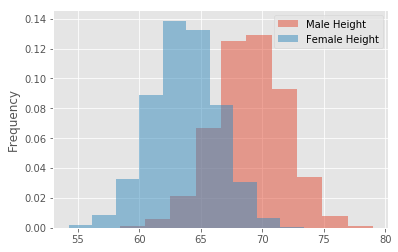

In [7]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = "Male Height")
female_df.Height.plot.hist(bins= binsize, density = True, alpha = 0.5, label = "Female Height")
plt.legend()
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?

#uh yer

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

In [10]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
        
        
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)
# x,y = density(s)
# plt.plot(x,y, label = 'test')
# plt.legend()

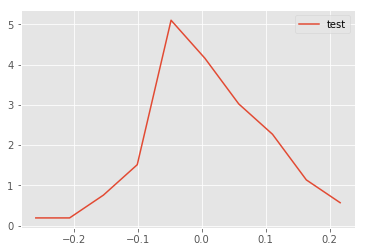

In [11]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

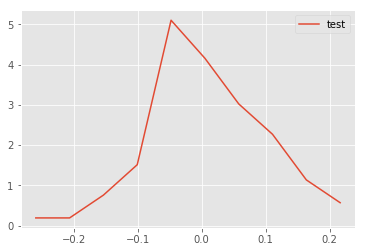

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

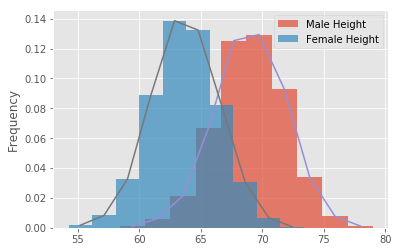

In [18]:
# You code here 
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()



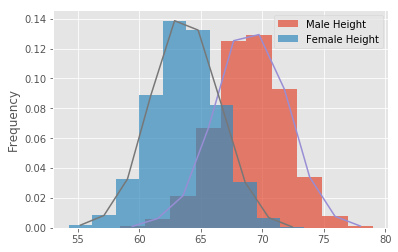

#### Repeat above exerice for male and female weights

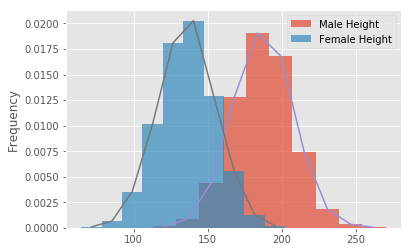

In [19]:
# Your code here 
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

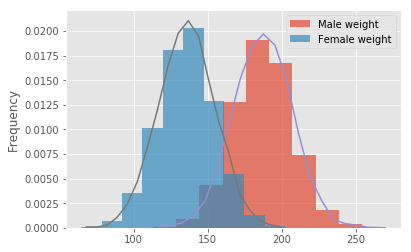

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 

#Girls are fat

#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


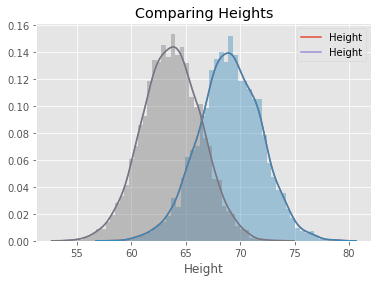

In [31]:
import seaborn as sns
sns.kdeplot(male_df.Height) 
sns.distplot(male_df.Height)
sns.kdeplot(female_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


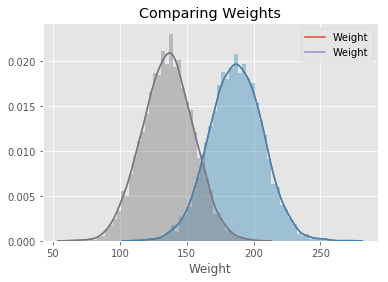

In [32]:
sns.kdeplot(male_df.Weight) 
sns.distplot(male_df.Weight)
sns.kdeplot(female_df.Weight)
sns.distplot(female_df.Weight)

plt.title('Comparing Weights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.